In [2]:
import importlib, os

# import torch 
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
ylimits = [0.2, 0.7]

### Tune the learning rate

In [4]:
results1_train = pd.read_pickle("cache/results1_train.pkl")
results1_val = pd.read_pickle("cache/results1_val.pkl")
results2_train = pd.read_pickle("cache/results2_train.pkl")
results2_val = pd.read_pickle("cache/results2_val.pkl")

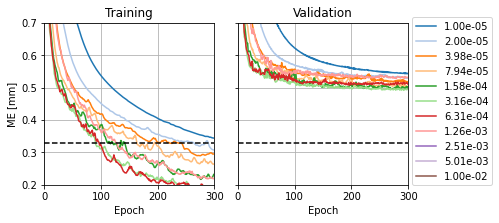

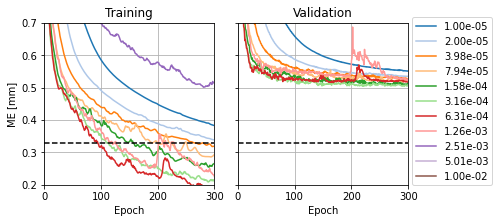

In [31]:
fig, axes = plt.subplots(1,2,figsize=(6,3.2), sharex=True, sharey=True)
x = np.arange(1,301)

ax: plt.Axes = axes.flatten()[0]
for i, (ax, data, title) in enumerate(zip(axes.flatten(), [results1_train, results1_val], ["Training","Validation"])):
    for idx, col in enumerate(data.columns):
        if i == 0:
            ax.plot(x, data[col], label=col, color=plt.cm.tab20(idx))
        else:
            ax.plot(x, data[col], color=plt.cm.tab20(idx))
    ax.set_title(title)
    ax.set_ylim(ylimits)
    ax.set_xlabel("Epoch")
    if i == 0:
        ax.set_ylabel("ME [mm]")
    ax.set_xlim([0, 300])
    ax.hlines(0.33, xmin=0, xmax=300, color="k", ls="--")

    ax.grid()
    # if i==0:
    #     ax.legend()
fig.tight_layout()
fig.legend(bbox_to_anchor=(0.95,0.93), loc="upper left")
fig.savefig("plots/learning_rate_first_model1.pdf",format="pdf",bbox_inches="tight")

fig, axes = plt.subplots(1,2,figsize=(6,3.2), sharex=True, sharey=True)
for i, (ax, data, title) in enumerate(zip(axes.flatten(), [results2_train, results2_val], ["Training","Validation"])):
    for idx, col in enumerate(data.columns):
        if i == 0:
            ax.plot(x, data[col], label=col, color=plt.cm.tab20(idx))
        else:
            ax.plot(x, data[col], color=plt.cm.tab20(idx))
    # ax.set_yscale("log")
    ax.set_title(title)
    ax.set_ylim(ylimits)
    ax.set_xlabel("Epoch")
    if i == 0:
        ax.set_ylabel("ME [mm]")
    ax.set_xlim([0, 300])
    ax.hlines(0.33, xmin=0, xmax=300, color="k", ls="--")
    ax.grid()
    #if i==0:
        #ax.legend()
fig.tight_layout()
fig.legend(bbox_to_anchor=(0.95,0.93), loc="upper left")
fig.savefig("plots/learning_rate_first_model2.pdf",format="pdf",bbox_inches="tight")

plt.show()


results1 use
    hyperparameters['strides'] =        [1, 3, 1, 1]  + [1]
    hyperparameters['paddings'] =       [200*3, 0, 0, 0]  + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 3*3, 7, 7] + [3]
    hyperparameters['channels'] =       [128, 256, 64, 32]
while results2 use
    hyperparameters['strides'] =        [1, 3, 1, 1]  + [1]
    hyperparameters['paddings'] =       [200*3, 0, 0, 0]  + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1,3*3, 7, 7] + [3]
    hyperparameters['channels'] =       [64, 128, 64, 32]

In [5]:
display(results1_val.tail(5))
display(results2_val.tail(5))
display(results1_val.min(0))
display(results2_val.min(0))

,1.00e-05,2.00e-05,3.98e-05,7.94e-05,1.58e-04,3.16e-04,6.31e-04,1.26e-03,2.51e-03,5.01e-03,1.00e-02
295,0.546351,0.529727,0.518064,0.502313,0.499848,0.494564,0.514054,0.532907,0.862745,0.862745,0.863185
296,0.543358,0.530969,0.519261,0.505434,0.503588,0.493730,0.515599,0.530728,0.862745,0.862745,0.863184
297,0.543981,0.529473,0.517569,0.503899,0.500643,0.494597,0.514707,0.532243,0.862745,0.862745,0.863182
298,0.544558,0.530116,0.518759,0.504271,0.503152,0.494732,0.511566,0.532143,0.862745,0.862745,0.863181
299,0.542885,0.529468,0.517299,0.505154,0.498637,0.494597,0.510903,0.530550,0.862745,0.862746,0.863179


,1.00e-05,2.00e-05,3.98e-05,7.94e-05,1.58e-04,3.16e-04,6.31e-04,1.26e-03,2.51e-03,5.01e-03,1.00e-02
295,0.551793,0.535585,0.529876,0.524969,0.509959,0.508129,0.517372,0.523795,0.713222,0.778962,0.863202
296,0.552019,0.535161,0.527470,0.520096,0.510787,0.505286,0.519815,0.526389,0.718455,0.773663,0.863199
297,0.551345,0.535449,0.528282,0.524996,0.511357,0.507553,0.520028,0.525215,0.717320,0.779267,0.863196
298,0.551740,0.535043,0.527455,0.521892,0.515123,0.506621,0.517663,0.521966,0.712336,0.772912,0.863193
299,0.551288,0.535453,0.528150,0.526944,0.512575,0.504855,0.518332,0.527303,0.714100,0.765439,0.863189


1.00e-05    0.542885
2.00e-05    0.529468
3.98e-05    0.517299
7.94e-05    0.502260
1.58e-04    0.495086
3.16e-04    0.491911
6.31e-04    0.508018
1.26e-03    0.527798
2.51e-03    0.862745
5.01e-03    0.862643
1.00e-02    0.863170
dtype: float64

1.00e-05    0.551288
2.00e-05    0.535043
3.98e-05    0.527041
7.94e-05    0.517126
1.58e-04    0.507400
3.16e-04    0.504378
6.31e-04    0.515951
1.26e-03    0.521966
2.51e-03    0.708328
5.01e-03    0.745714
1.00e-02    0.863189
dtype: float64

### Tune the architecture

In [32]:
results3_train = pd.read_pickle("cache/results3_train.pkl")
results3_val = pd.read_pickle("cache/results3_val.pkl")

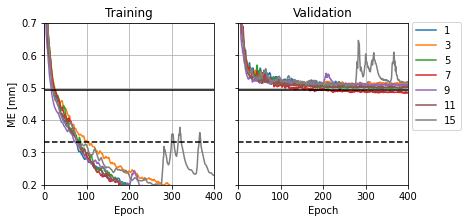

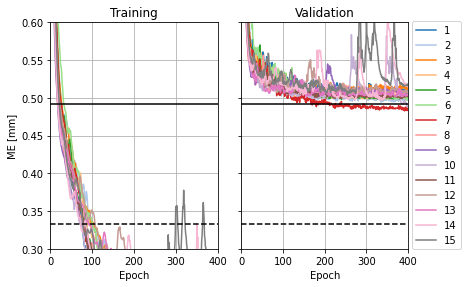

In [36]:
fig, axes = plt.subplots(1,2,figsize=(6,3.2), sharex=True, sharey=True)
x = np.arange(1,401)

for i, (ax, data, title) in enumerate(zip(axes.flatten(), [results3_train, results3_val], ["Training","Validation"])):
    for idx in [0,2,4,6,8,10,14]:
        if i == 0:
            ax.plot(x, data.iloc[:,idx], label=data.columns[idx], color=plt.cm.tab20(idx))
        else:
            ax.plot(x, data.iloc[:,idx], color=plt.cm.tab20(idx))
    ax.set_title(title)
    ax.set_ylim(ylimits)
    ax.set_xlabel("Epoch")
    if i == 0:
        ax.set_ylabel("ME [mm]")
    ax.set_xlim([0, 400])
    ax.hlines(0.333, xmin=0, xmax=400, color="k", ls="--")
    ax.hlines(0.492, xmin=0, xmax=400, color="k", ls="-")
    ax.grid()
    # if i==0:
    #     ax.legend()

fig.legend(bbox_to_anchor=(0.95,0.91), loc="upper left")
fig.tight_layout()
fig.savefig("plots/Architectures.pdf",format="pdf",bbox_inches="tight")

fig, axes = plt.subplots(1,2,figsize=(6,4.1), sharex=True, sharey=True)
x = np.arange(1,401)

for i, (ax, data, title) in enumerate(zip(axes.flatten(), [results3_train, results3_val], ["Training","Validation"])):
    for idx,col in enumerate(data.columns):
        if i == 0:
            ax.plot(x, data[col], label=col, color=plt.cm.tab20(idx))
        else:
            ax.plot(x, data[col], color=plt.cm.tab20(idx))
    ax.set_title(title)
    ax.set_ylim([0.3, 0.6])
    ax.set_xlabel("Epoch")
    if i == 0:
        ax.set_ylabel("ME [mm]")
    ax.set_xlim([0, 400])
    ax.hlines(0.333, xmin=0, xmax=400, color="k", ls="--")
    ax.hlines(0.492, xmin=0, xmax=400, color="k", ls="-")
    ax.grid()
    # if i==0:
    #     ax.legend()

fig.tight_layout()
fig.legend(bbox_to_anchor=(0.95,0.93), loc="upper left")
fig.savefig("plots/Architectures all.pdf",format="pdf",bbox_inches="tight")

plt.show()

In [8]:
display(results3_val.tail(5))
display(["{:.2f}".format(i) for i in results3_val.min(0).values])
display(results3_val.min(0))

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
395,0.509097,0.497316,0.510872,0.502478,0.500454,0.496834,0.484745,0.505441,0.505728,0.490043,0.502084,0.509507,0.502931,0.517571,0.517259
396,0.507993,0.496438,0.513705,0.502351,0.500300,0.501278,0.486532,0.504535,0.509275,0.487938,0.501210,0.506758,0.503143,0.516125,0.515980
397,0.507634,0.496764,0.511781,0.499550,0.501171,0.499002,0.485917,0.507407,0.508863,0.489712,0.502688,0.508360,0.503230,0.515337,0.517405
398,0.509465,0.497109,0.512465,0.500000,0.501590,0.498784,0.483138,0.505383,0.509328,0.491243,0.504992,0.506166,0.504492,0.517683,0.516344
399,0.509418,0.497045,0.512552,0.499159,0.500717,0.497659,0.484371,0.507640,0.507987,0.488941,0.502892,0.507097,0.503971,0.514510,0.518769


['0.51',
 '0.49',
 '0.50',
 '0.50',
 '0.50',
 '0.50',
 '0.48',
 '0.50',
 '0.51',
 '0.49',
 '0.50',
 '0.51',
 '0.50',
 '0.50',
 '0.50']

1     0.505950
2     0.494076
3     0.502032
4     0.497037
5     0.497638
6     0.496834
7     0.482642
8     0.504535
9     0.505728
10    0.487938
11    0.498909
12    0.505372
13    0.500859
14    0.497108
15    0.504029
dtype: float64

The above numbers correspond to the values
```
if args.parameter_settings == 1:
    hyperparameters['strides'] =        [3,       1,   1,   1  ] + [1]
    hyperparameters['paddings'] =       [200*3,   0,   0,   0  ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9,   7,   7  ] + [3]
    hyperparameters['channels'] =       [128,     256, 64,  32 ]
elif args.parameter_settings == 2:
    hyperparameters['strides'] =        [1,       1,   3,   1  ] + [1]
    hyperparameters['paddings'] =       [200*3,   0,   0,   0  ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9,   7,   7  ] + [3]
    hyperparameters['channels'] =       [128,     256, 64,  32 ]
elif args.parameter_settings == 3:
    hyperparameters['strides'] =        [1,       1,   1,   3  ] + [1]
    hyperparameters['paddings'] =       [200*3,   0,   0,   0  ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9,   7,   7  ] + [3]
    hyperparameters['channels'] =       [128,     256, 64,  32 ]
elif args.parameter_settings == 4:
    hyperparameters['strides'] =        [1,       3,   1,   1  ] + [1]
    hyperparameters['paddings'] =       [200*3,   0,   0,   0  ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9,   7,   7  ] + [3]
    hyperparameters['channels'] =       [128,     128, 64,  32 ]
elif args.parameter_settings == 5:
    hyperparameters['strides'] =        [1,       3,   1,   1  ] + [1]
    hyperparameters['paddings'] =       [200*3,   0,   0,   0  ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9,   7,   7  ] + [3]
    hyperparameters['channels'] =       [128,     128, 128,  32 ]
elif args.parameter_settings == 6:
    hyperparameters['strides'] =        [1,       3,   1,   1  ] + [1]
    hyperparameters['paddings'] =       [200*3,   0,   0,   0  ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9,   7,   7  ] + [3]
    hyperparameters['channels'] =       [128,     64,  32,  16 ]
elif args.parameter_settings == 7:
    hyperparameters['strides'] =        [1,       3,   1,   1  ] + [1]
    hyperparameters['paddings'] =       [200*3,   0,   0,   0  ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9,   7,   7  ] + [3]
    hyperparameters['channels'] =       [256,     256, 64,  32 ]
elif args.parameter_settings == 8:
    hyperparameters['strides'] =        [1,       3  ] + [1]
    hyperparameters['paddings'] =       [200*3,   0  ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9  ] + [3]
    hyperparameters['channels'] =       [128,     256]
elif args.parameter_settings == 9:
    hyperparameters['strides'] =        [1,       3  ] + [1]
    hyperparameters['paddings'] =       [200*3,   0  ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9  ] + [3]
    hyperparameters['channels'] =       [128,     128]
elif args.parameter_settings == 10:
    hyperparameters['strides'] =        [1,       3,   1 ] + [1]
    hyperparameters['paddings'] =       [200*3,   0,   0 ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9,   7 ] + [3]
    hyperparameters['channels'] =       [128,     256, 64]
elif args.parameter_settings == 11:
    hyperparameters['strides'] =        [1,       3,   1 ] + [1]
    hyperparameters['paddings'] =       [200*3,   0,   0 ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9,   7 ] + [3]
    hyperparameters['channels'] =       [128,     128, 64]
elif args.parameter_settings == 12:
    hyperparameters['strides'] =        [1,       3  ] + [1]
    hyperparameters['paddings'] =       [0,       0  ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9  ] + [3]
    hyperparameters['channels'] =       [64,      32 ]
elif args.parameter_settings == 13:
    hyperparameters['strides'] =        [1,       3  ] + [1]
    hyperparameters['paddings'] =       [0,       0  ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9  ] + [3]
    hyperparameters['channels'] =       [64,      64 ]
elif args.parameter_settings == 14:
    hyperparameters['strides'] =        [3,       1  ] + [1]
    hyperparameters['paddings'] =       [0,       0  ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9  ] + [3]
    hyperparameters['channels'] =       [64,      64 ]
elif args.parameter_settings == 15:
    hyperparameters['strides'] =        [3,       1  ] + [1]
    hyperparameters['paddings'] =       [0,       0  ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9  ] + [3]
    hyperparameters['channels'] =       [64,      32 ]
```
A network with four hidden layers should be used 
```
elif args.parameter_settings == 5:
    hyperparameters['strides'] =        [1,       3,   1,   1  ] + [1]
    hyperparameters['paddings'] =       [200*3,   0,   0,   0  ] + [0]
    hyperparameters['kernel_lenghts'] = [400*3+1, 9,   7,   7  ] + [3]
    hyperparameters['channels'] =       [256,     256, 64,  32 ]
```

### Learning rate again

In [37]:
results6_train = pd.read_pickle("cache/results6_train.pkl")
results6_val = pd.read_pickle("cache/results6_val.pkl")

results6_train.columns = [5e-5, 1e-4, 2e-4, 6e-4, 1e-3, 2e-3]
results6_val.columns = [5e-5, 1e-4, 2e-4, 6e-4, 1e-3, 2e-3]

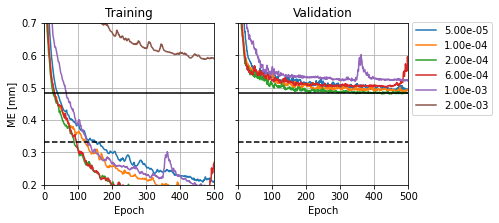

In [39]:
fig, axes = plt.subplots(1,2,figsize=(6,3.2), sharex=True, sharey=True)
x = np.arange(1,501)

for i, (ax, data, title) in enumerate(zip(axes.flatten(), [results6_train, results6_val], ["Training","Validation"])):
    for col in data.columns:
        if i == 0:
            ax.plot(x, data[col], label="{:.2e}".format(col))
        else:
            ax.plot(x, data[col])
    # ax.set_yscale("log")
    ax.set_title(title)
    ax.set_ylim(ylimits)
    ax.set_xlabel("Epoch")
    if i == 0:
        ax.set_ylabel("ME [mm]")
    ax.set_xlim([0, 500])
    ax.hlines(0.333, xmin=0, xmax=500, color="k", ls="--")
    ax.hlines(0.483, xmin=0, xmax=500, color="k", ls="-")
    ax.grid()
    # if i==0:
    #     ax.legend()

fig.legend(bbox_to_anchor=(0.95,0.91), loc="upper left")
fig.tight_layout()
fig.savefig("plots/learning_rate_second.pdf",format="pdf",bbox_inches="tight")

plt.show()

In [11]:
display(results6_val.tail(5))
display(results6_val.min(0))

,0.00005,0.00010,0.00020,0.00060,0.00100,0.00200
495,0.494273,0.492796,0.483254,0.565380,0.524255,0.821873
496,0.494321,0.490701,0.482936,0.552074,0.524442,0.824007
497,0.495670,0.491033,0.483375,0.595788,0.521218,0.821971
498,0.494394,0.492983,0.484158,0.569870,0.524579,0.824458
499,0.494513,0.491874,0.482997,0.561172,0.521913,0.822156


0.00005    0.492298
0.00010    0.488296
0.00020    0.480478
0.00060    0.502011
0.00100    0.519562
0.00200    0.791684
dtype: float64

Learning rate should not be changed. 

### Dropout

In [40]:
results7_train = pd.read_pickle("cache/results7_train.pkl")
results7_val = pd.read_pickle("cache/results7_val.pkl")

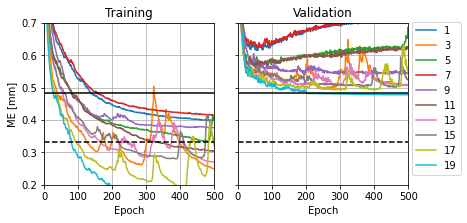

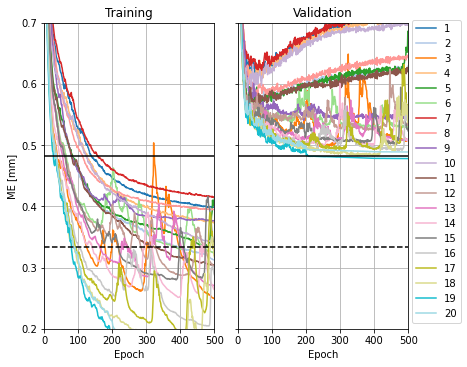

In [46]:
fig, axes = plt.subplots(1,2,figsize=(6,3.2), sharex=True, sharey=True)
x = np.arange(1,501)

for i, (ax, data, title) in enumerate(zip(axes.flatten(), [results7_train, results7_val], ["Training","Validation"])):
    for idx,col in enumerate(data.columns[0:20:2]):
        if i == 0:
            ax.plot(x, data[col], label=col, color=plt.cm.tab20(col-1))
        else:
            ax.plot(x, data[col], color=plt.cm.tab20(col-1))
    # ax.set_yscale("log")
    ax.set_title(title)
    ax.set_ylim(ylimits)
    ax.set_xlabel("Epoch")
    if i == 0:
        ax.set_ylabel("ME [mm]")
    ax.set_xlim([0, 500])
    ax.hlines(0.333, xmin=0, xmax=500, color="k", ls="--")
    ax.hlines(0.483, xmin=0, xmax=500, color="k", ls="-")
    ax.grid()
    # if i==0:
    #     ax.legend()

fig.legend(bbox_to_anchor=(0.95,0.91), loc="upper left")
fig.tight_layout()
fig.savefig("plots/Dropout ME.pdf",format="pdf",bbox_inches="tight")

fig, axes = plt.subplots(1,2,figsize=(6,5.2), sharex=True, sharey=True)
x = np.arange(1,501)

for i, (ax, data, title) in enumerate(zip(axes.flatten(), [results7_train, results7_val], ["Training","Validation"])):
    for idx,col in enumerate(data.columns[:20]):
        if i == 0:
            ax.plot(x, data[col], label=col, color=plt.cm.tab20(col-1))
        else:
            ax.plot(x, data[col], color=plt.cm.tab20(col-1))
    # ax.set_yscale("log")
    ax.set_title(title)
    ax.set_ylim(ylimits)
    ax.set_xlabel("Epoch")
    if i == 0:
        ax.set_ylabel("ME [mm]")
    ax.set_xlim([0, 500])
    ax.hlines(0.333, xmin=0, xmax=500, color="k", ls="--")
    ax.hlines(0.483, xmin=0, xmax=500, color="k", ls="-")
    ax.grid()
    # if i==0:
    #     ax.legend()

fig.legend(bbox_to_anchor=(0.95,0.95), loc="upper left")
fig.tight_layout()
fig.savefig("plots/Dropout ME all.pdf", format="pdf",bbox_inches="tight")

plt.show()

In [14]:
display(results7_val.tail(5))
display(results7_val.min(0))

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
495,0.710607,0.623196,0.507271,0.705466,0.657132,0.528822,0.713675,0.642812,0.544638,0.696739,...,0.509911,0.508627,0.527615,0.553427,0.566819,0.565242,0.478371,0.489048,0.497025,0.491281
496,0.712253,0.625042,0.508884,0.706824,0.652230,0.532219,0.715598,0.646242,0.546187,0.702676,...,0.508330,0.507534,0.526002,0.557518,0.554625,0.550288,0.478413,0.489023,0.497036,0.491281
497,0.710367,0.626617,0.508625,0.705704,0.658849,0.528641,0.713297,0.643946,0.543852,0.696977,...,0.509637,0.509217,0.525947,0.556514,0.554332,0.562029,0.478411,0.489030,0.497032,0.491290
498,0.715206,0.625004,0.507169,0.708673,0.686577,0.531171,0.718120,0.647249,0.545949,0.704913,...,0.509175,0.506547,0.527893,0.547325,0.557599,0.537179,0.478367,0.489065,0.497015,0.491281
499,0.712019,0.629823,0.508687,0.705223,0.661682,0.530170,0.715195,0.647430,0.544358,0.696469,...,0.509460,0.509873,0.523547,0.548539,0.542054,0.539357,0.478321,0.489070,0.496987,0.491257


1     0.615006
2     0.568651
3     0.496353
4     0.607236
5     0.562871
6     0.528010
7     0.622618
8     0.577851
9     0.540878
10    0.594029
11    0.566842
12    0.523687
13    0.507687
14    0.499682
15    0.501865
16    0.491508
17    0.493296
18    0.482872
19    0.478321
20    0.489023
21    0.496477
22    0.491200
dtype: float64

### Batch normalization

In [47]:
results8_train = pd.read_pickle("cache/results8_train.pkl")
results8_val = pd.read_pickle("cache/results8_val.pkl")

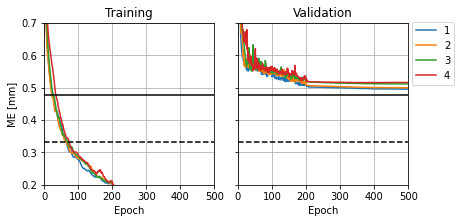

In [51]:
fig, axes = plt.subplots(1,2,figsize=(6,3.2), sharex=True, sharey=True)
x = np.arange(1,501)

for i, (ax, data, title) in enumerate(zip(axes.flatten(), [results8_train, results8_val], ["Training","Validation"])):
    for col in data.columns:
        if i == 0:
            ax.plot(x, data[col], label=col)
        else:
            ax.plot(x, data[col])
    # ax.set_yscale("log")
    ax.set_title(title)
    ax.set_ylim(ylimits)
    ax.set_xlabel("Epoch")
    if i == 0:
        ax.set_ylabel("ME [mm]")
    ax.set_xlim([0, 500])
    ax.hlines(0.333, xmin=0, xmax=500, color="k", ls="--")
    ax.hlines(0.478, xmin=0, xmax=500, color="k", ls="-")
    ax.grid()
    # if i==0:
    #     ax.legend()

fig.legend(bbox_to_anchor=(0.95,0.91), loc="upper left")
fig.tight_layout()
fig.savefig("plots/Batch normalization.pdf", format="pdf",bbox_inches="tight")
plt.show()

### Changing the seed

In [52]:
results9_train = pd.read_pickle("cache/results9_train.pkl")
results9_val = pd.read_pickle("cache/results9_val.pkl")

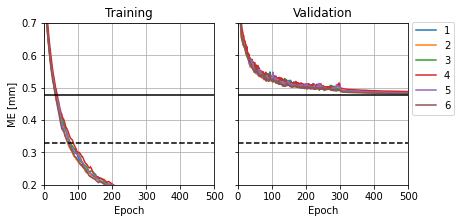

In [53]:
fig, axes = plt.subplots(1,2,figsize=(6,3.2), sharex=True, sharey=True)
x = np.arange(1,501)

for i, (ax, data, title) in enumerate(zip(axes.flatten(), [results9_train, results9_val], ["Training","Validation"])):
    for col in data.columns:
        if i == 0:
            ax.plot(x, data[col], label=col)
        else:
            ax.plot(x, data[col])
    # ax.set_yscale("log")
    ax.set_title(title)
    ax.set_ylim(ylimits)
    ax.set_xlabel("Epoch")
    if i == 0:
        ax.set_ylabel("ME [mm]")
    ax.set_xlim([0, 500])
    ax.hlines(0.33, xmin=0, xmax=500, color="k", ls="--")
    ax.hlines(0.478, xmin=0, xmax=500, color="k", ls="-")
    ax.grid()
    # if i==0:
    #     ax.legend()

fig.legend(bbox_to_anchor=(0.95,0.91), loc="upper left")
fig.tight_layout()
fig.savefig("plots/Seeds.pdf",format="pdf",bbox_inches="tight")
plt.show()


In [19]:
display(results9_val.min(0))

1    0.483514
2    0.482220
3    0.484613
4    0.488186
5    0.483904
6    0.481416
dtype: float64

Results are quite regular across seeds

### Try using longer kernels and a bit of architecture changes

In [54]:
results10_train = pd.read_pickle("cache/results10_train.pkl")
results10_val = pd.read_pickle("cache/results10_val.pkl")

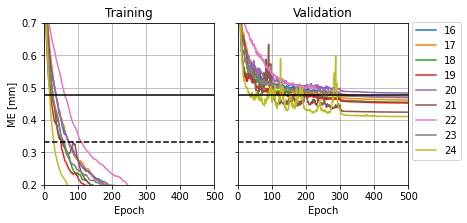

In [55]:
fig, axes = plt.subplots(1,2,figsize=(6,3.2), sharex=True, sharey=True)
x = np.arange(1,501)

for i, (ax, data, title) in enumerate(zip(axes.flatten(), [results10_train, results10_val], ["Training","Validation"])):
    for col in data.columns:
        if i == 0:
            ax.plot(x, data[col], label=col)
        else:
            ax.plot(x, data[col])
    # ax.set_yscale("log")
    ax.set_title(title)
    ax.set_ylim(ylimits)
    ax.set_xlabel("Epoch")
    if i == 0:
        ax.set_ylabel("ME [mm]")
    ax.set_xlim([0, 500])
    ax.hlines(0.333, xmin=0, xmax=500, color="k", ls="--")
    ax.hlines(0.478, xmin=0, xmax=500, color="k", ls="-")
    ax.grid()
    # if i==0:
    #     ax.legend()

fig.legend(bbox_to_anchor=(0.95,0.91), loc="upper left")
fig.tight_layout()
fig.savefig("plots/Architectures round2.pdf",bbox_inches="tight")

plt.show()

In [22]:
display(results10_val.tail(5))
display(results10_val.min(0))

,16,17,18,19,20,21,22,23,24
495,0.470598,0.461922,0.455123,0.452802,0.483240,0.424402,0.471887,0.469333,0.411165
496,0.470591,0.461942,0.455053,0.452787,0.483275,0.424363,0.471861,0.469329,0.411222
497,0.470534,0.461970,0.455065,0.452774,0.483283,0.424129,0.471805,0.469297,0.410999
498,0.470549,0.461811,0.455042,0.452739,0.483272,0.424257,0.471779,0.469297,0.410813
499,0.470610,0.461718,0.455014,0.452641,0.483336,0.424512,0.471832,0.469155,0.410771


16    0.470505
17    0.461718
18    0.455014
19    0.452641
20    0.483240
21    0.424129
22    0.471740
23    0.469155
24    0.410727
dtype: float64

### Activation function

In [56]:
results12_train = pd.read_pickle("cache/results12_train.pkl")
results12_val = pd.read_pickle("cache/results12_val.pkl")

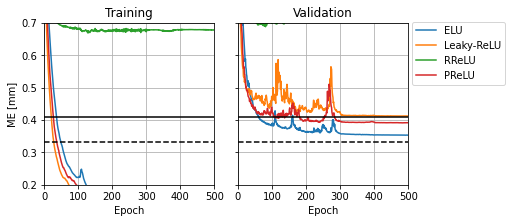

In [58]:
fig, axes = plt.subplots(1,2,figsize=(6,3.2), sharex=True, sharey=True)
x = np.arange(1,501)

for i, (ax, data, title) in enumerate(zip(axes.flatten(), [results12_train, results12_val], ["Training","Validation"])):
    for col in data.columns:
        if i == 0:
            ax.plot(x, data[col], label=col)
        else:
            ax.plot(x, data[col])
    # ax.set_yscale("log")
    ax.set_title(title)
    ax.set_ylim(ylimits)
    ax.set_xlabel("Epoch")
    if i == 0:
        ax.set_ylabel("ME [mm]")
    ax.set_xlim([0, 500])
    ax.hlines(0.333, xmin=0, xmax=500, color="k", ls="--")
    ax.hlines(0.411, xmin=0, xmax=500, color="k", ls="-")
    ax.grid()
    # if i==0:
    #     ax.legend()

fig.legend(bbox_to_anchor=(0.95,0.91), loc="upper left")
fig.tight_layout()
fig.savefig("plots/Activation functions ME.pdf", format="pdf",bbox_inches="tight")

plt.show()

In [25]:
display(results12_val.tail(5))
display(results12_val.min(0))

,ELU,Leaky-ReLU,RReLU,PReLU
495,0.353666,0.412797,0.822119,0.391918
496,0.353593,0.412808,0.827985,0.391994
497,0.353516,0.412659,0.824151,0.392033
498,0.353534,0.412516,0.825801,0.391896
499,0.353414,0.412602,0.824242,0.391826


ELU           0.353367
Leaky-ReLU    0.412494
RReLU         0.688562
PReLU         0.391410
dtype: float64

Testing the following activation functions

1. ReLU
2. ELU
3. LeakyReLU
4. RReLU
5. PReLU

### Weight decay

In [60]:
results13_train = pd.read_pickle("cache/results13_train.pkl")
results13_val = pd.read_pickle("cache/results13_val.pkl")

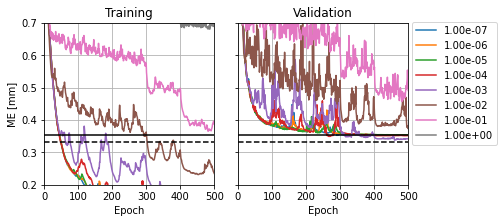

In [61]:
fig, axes = plt.subplots(1,2,figsize=(6,3.2), sharex=True, sharey=True)
x = np.arange(1,501)

for i, (ax, data, title) in enumerate(zip(axes.flatten(), [results13_train, results13_val], ["Training","Validation"])):
    for col in data.columns:
        if i == 0:
            ax.plot(x, data[col], label=col)
        else:
            ax.plot(x, data[col])
    # ax.set_yscale("log")
    ax.set_title(title)
    ax.set_ylim(ylimits)
    ax.set_xlabel("Epoch")
    if i == 0:
        ax.set_ylabel("ME [mm]")
    ax.set_xlim([0, 500])
    ax.hlines(0.333, xmin=0, xmax=500, color="k", ls="--")
    ax.hlines(0.353, xmin=0, xmax=500, color="k", ls="-")
    ax.grid()
    # if i==0:
    #     ax.legend()

fig.legend(bbox_to_anchor=(0.95,0.91), loc="upper left")
fig.tight_layout()
fig.savefig("plots/Weight decay.pdf", format="pdf",bbox_inches="tight")

plt.show()

In [28]:
display(results13_val.tail(5))
display(results13_val.min(0))
display(["{:.2f}".format(e) for e in results13_val.min(0).values])

,1.00e-07,1.00e-06,1.00e-05,1.00e-04,1.00e-03,1.00e-02,1.00e-01,1.00e+00
495,0.353750,0.354116,0.354324,0.352088,0.342327,0.379004,0.514547,0.733712
496,0.353761,0.354051,0.354312,0.351936,0.341844,0.382863,0.526188,0.710579
497,0.353821,0.354036,0.354332,0.351957,0.342417,0.376518,0.554341,0.703422
498,0.353927,0.354062,0.354247,0.352007,0.342289,0.381029,0.527383,0.719685
499,0.353808,0.353946,0.354207,0.352026,0.342270,0.374292,0.491465,0.748539


1.00e-07    0.352803
1.00e-06    0.353920
1.00e-05    0.354043
1.00e-04    0.349277
1.00e-03    0.337978
1.00e-02    0.374292
1.00e-01    0.457428
1.00e+00    0.703422
dtype: float64

['0.35', '0.35', '0.35', '0.35', '0.34', '0.37', '0.46', '0.70']

Use 1e-03 as weight decay

### Choosing the best optimizer

In [62]:
results15_train = pd.read_pickle("cache/results15_train.pkl")
results15_val = pd.read_pickle("cache/results15_val.pkl")

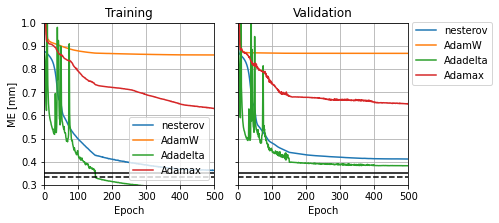

In [63]:
fig, axes = plt.subplots(1,2,figsize=(6,3.2), sharex=True, sharey=True)
x = np.arange(1,501)

for i, (ax, data, title) in enumerate(zip(axes.flatten(), [results15_train, results15_val], ["Training","Validation"])):
    for idx, col in enumerate(data.columns):
        if i == 0:
            ax.plot(x, data[col], label=col, color=plt.cm.tab10(idx))
        else:
            ax.plot(x, data[col], color=plt.cm.tab10(idx))
    # ax.set_yscale("log")
    ax.set_title(title)
    ax.set_ylim([0.3, 1.0])
    ax.set_xlabel("Epoch")
    if i == 0:
        ax.set_ylabel("ME [mm]")
    ax.set_xlim([0, 500])
    ax.hlines(0.333, xmin=0, xmax=500, color="k", ls="--")
    ax.hlines(0.353, xmin=0, xmax=500, color="k", ls="-")
    ax.grid()
    if i==0:
        ax.legend()

fig.legend(bbox_to_anchor=(0.95,0.91), loc="upper left")
fig.tight_layout()
fig.savefig("plots/Optimizers.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [31]:
display(results15_val.tail(5))
display(results15_val.min(0))

,nesterov,AdamW,Adadelta,Adamax
495,0.411662,0.868645,0.382485,0.650225
496,0.411660,0.868644,0.382262,0.650125
497,0.411646,0.868642,0.382676,0.651059
498,0.411599,0.868640,0.382512,0.651468
499,0.411536,0.868641,0.382627,0.649708


nesterov    0.411536
AdamW       0.868627
Adadelta    0.382014
Adamax      0.649708
dtype: float64

### Pretrained model

In [65]:
results17_train = pd.read_pickle("cache/results17_train.pkl")
results17_val = pd.read_pickle("cache/results17_val.pkl")

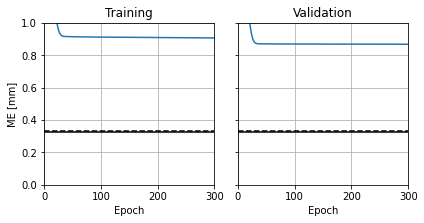

In [66]:
fig, axes = plt.subplots(1,2,figsize=(6,3.2), sharex=True, sharey=True)
x = np.arange(1,801)

for i, (ax, data, title) in enumerate(zip(axes.flatten(), [results17_train, results17_val], ["Training","Validation"])):
    for idx, col in enumerate(data.columns):
        if i == 0:
            ax.plot(x, data[col], label=col, color=plt.cm.tab10(idx))
        else:
            ax.plot(x, data[col], color=plt.cm.tab10(idx))
    # ax.set_yscale("log")
    ax.set_title(title)
    ax.set_ylim([0, 1])
    ax.set_xlabel("Epoch")
    if i == 0:
        ax.set_ylabel("ME [mm]")
    ax.set_xlim([0, 300])
    ax.hlines(0.333, xmin=0, xmax=300, color="k", ls="--")
    ax.hlines(0.325, xmin=0, xmax=300, color="k", ls="-")
    ax.grid()

fig.tight_layout()
fig.savefig("plots/Pretrained model.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [34]:
display(results17_val.tail(5))
display(results17_val.min(0))

,1
795,0.867262
796,0.867265
797,0.867268
798,0.867272
799,0.867273


1    0.867232
dtype: float64

### Dropout 2

In [67]:
results18_train = pd.read_pickle("cache/results18_train.pkl")
results18_val = pd.read_pickle("cache/results18_val.pkl")

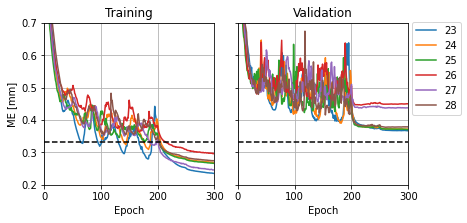

In [68]:
fig, axes = plt.subplots(1,2,figsize=(6,3.2), sharex=True, sharey=True)
x = np.arange(1,301)

for i, (ax, data, title) in enumerate(zip(axes.flatten(), [results18_train, results18_val], ["Training","Validation"])):
    for col in data.columns:
        if i == 0:
            ax.plot(x, data[col], label=col)
        else:
            ax.plot(x, data[col])
    # ax.set_yscale("log")
    ax.set_title(title)
    ax.set_ylim(ylimits)
    ax.set_xlabel("Epoch")
    if i == 0:
        ax.set_ylabel("ME [mm]")
    ax.set_xlim([0, 300])
    ax.hlines(0.333, xmin=0, xmax=300, color="k", ls="--")
    # ax.hlines(0.353, xmin=0, xmax=300, color="k", ls="-")
    ax.grid()
    # if i==0:
    #     ax.legend()

fig.legend(bbox_to_anchor=(0.95,0.91), loc="upper left")
fig.tight_layout()
fig.savefig("plots/Dropout2 ME.pdf", bbox_inches="tight")

plt.show()

In [44]:
display(results18_val.tail(5))
display(results18_val.min(0))
display(["{:.2f}".format(e) for e in results18_val.min(0)])

,23,24,25,26,27,28
295,0.367325,0.372181,0.371007,0.449921,0.437439,0.378816
296,0.367348,0.372081,0.370924,0.450344,0.437891,0.379112
297,0.366998,0.372342,0.370735,0.450409,0.437815,0.378864
298,0.367315,0.372050,0.370595,0.450465,0.437569,0.378857
299,0.366869,0.372264,0.370989,0.450326,0.437885,0.379511


23    0.366869
24    0.372050
25    0.370595
26    0.446315
27    0.437197
28    0.377932
dtype: float64

['0.37', '0.37', '0.37', '0.45', '0.44', '0.38']

### Long run

In [69]:
results19_train = pd.read_pickle("cache/results19_train.pkl")
results19_val = pd.read_pickle("cache/results19_val.pkl")
results19_train_max = pd.read_pickle("cache/results19_train_max.pkl")
results19_val_max = pd.read_pickle("cache/results19_val_max.pkl")

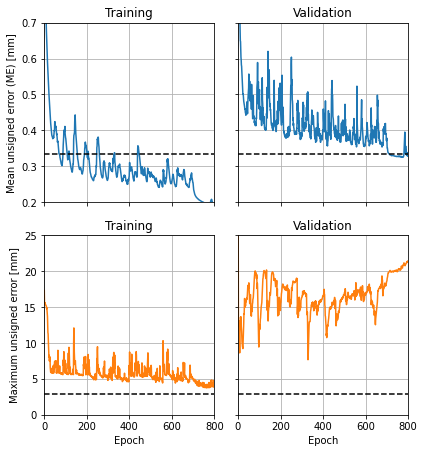

In [70]:
fig, axes = plt.subplots(2,2,figsize=(6,6.4), sharex=True, sharey="row")
x = np.arange(1,801)

for i, (ax, data, title) in enumerate(zip(
        axes.flatten(), 
        [results19_train, results19_val, results19_train_max, results19_val_max], 
        ["Training","Validation","Training","Validation"])):
    for col in data.columns:
        ax.plot(x, data[col], color=plt.cm.tab10(i//2))
    ax.set_title(title)
    if i == 0:
        ax.set_ylim(ylimits)
        ax.set_ylabel("Mean unsigned error (ME) [mm]")
    elif i == 2:
        ax.set_ylim([0, 25])
        ax.set_ylabel("Maximum unsigned error [mm]")
    if i > 1:
        ax.set_xlabel("Epoch")
    
    ax.set_xlim([0, 800])
    if i < 2:
        ax.hlines(0.333, xmin=0, xmax=800, color="k", ls="--")
    else:
        ax.hlines(2.94, xmin=0, xmax=800, color="k", ls="--")
    # ax.hlines(0.338, xmin=0, xmax=800, color="k", ls="-")
    ax.grid()
    
fig.tight_layout()
fig.savefig("plots/Final CNN model.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [40]:
display(results19_val.tail(5))
display(results19_val.min(0))

,0
795,0.333051
796,0.329685
797,0.328808
798,0.329032
799,0.328428


0    0.325333
dtype: float64

### Generated data

In [71]:
results20_train = pd.read_pickle("cache/results20_train.pkl")
results20_val = pd.read_pickle("cache/results20_val.pkl")
results20_train_max = pd.read_pickle("cache/results20_train_max.pkl")
results20_val_max = pd.read_pickle("cache/results20_val_max.pkl")

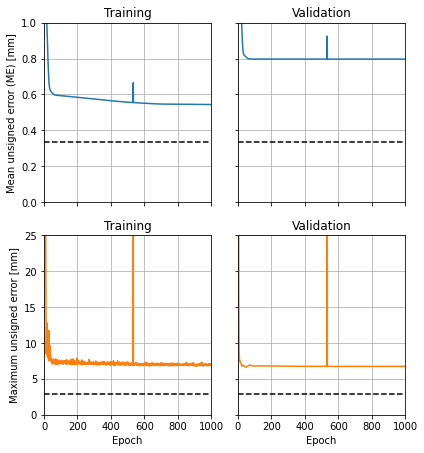

In [72]:
fig, axes = plt.subplots(2,2,figsize=(6,6.4), sharex=True, sharey="row")
x = np.arange(1,1001)

for i, (ax, data, title) in enumerate(zip(
        axes.flatten(), 
        [results20_train, results20_val, results20_train_max, results20_val_max], 
        ["Training","Validation","Training","Validation"])):
    for col in data.columns:
        ax.plot(x, data[col], color=plt.cm.tab10(i//2))
    ax.set_title(title)
    if i == 0:
        ax.set_ylim([0, 1])
        ax.set_ylabel("Mean unsigned error (ME) [mm]")
    elif i == 2:
        ax.set_ylim([0, 25])
        ax.set_ylabel("Maximum unsigned error [mm]")
    if i > 1:
        ax.set_xlabel("Epoch")
    
    ax.set_xlim([0, 1000])
    if i < 2:
        ax.hlines(0.333, xmin=0, xmax=1000, color="k", ls="--")
    else:
        ax.hlines(2.94, xmin=0, xmax=1000, color="k", ls="--")
    # ax.hlines(0.338, xmin=0, xmax=1000, color="k", ls="-")
    ax.grid()
    
fig.tight_layout()

fig.savefig("plots/Generated data.pdf", format="pdf", bbox_inches="tight")